In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
iris = load_iris()

# Iris Numpy
X, y = iris.data, iris.target
print(X[:5])
print(y[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [7]:
# Iris Dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# Numpy and Dataframe Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Pipeline Numpy
np_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

# Pipeline Dataframe
df_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [9]:
# Splitting Data

# numpy split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# dataframe split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [10]:
from sklearn.metrics import classification_report
# Training

# numpy training
np_pipeline.fit(X_train, y_train)
y_pred = np_pipeline.predict(X_test)
print("Report Numpy")
print(classification_report(y_test, y_pred))



# dataframe training
df_pipeline.fit(df_train.drop('target', axis=1), df_train['target'])
y_pred = df_pipeline.predict(df_test.drop('target', axis=1))
print("Report Dataframe")
print(classification_report(df_test['target'], y_pred))

Report Numpy
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Report Dataframe
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# Evaluation

# numpy evaluation
np_pipeline.score(X_test, y_test)

# dataframe evaluation
df_pipeline.score(df_test.drop('target', axis=1), df_test['target'])

1.0

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


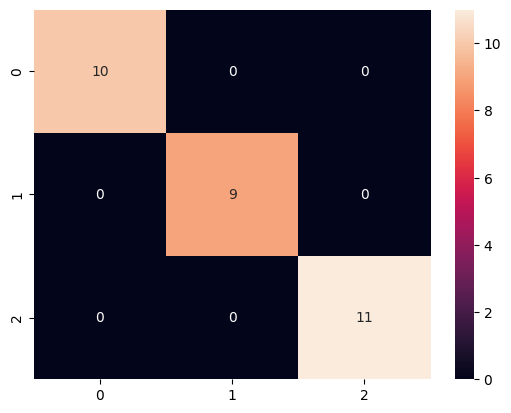

In [14]:
# Confustion Matrix with seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Confusion matrix visualization
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [15]:
# Save Model
import pickle

# Numpy Save Model
with open('np_model.pkl', 'wb') as f:
    pickle.dump(np_pipeline, f)

# Dataframe Save Model
with open('df_model.pkl', 'wb') as f:
    pickle.dump(df_pipeline, f)

In [17]:
# Load Model
# Numpy load model
with open('np_model.pkl', 'rb') as f:
    np_model = pickle.load(f)

# Dataframe load model
with open('df_model.pkl', 'rb') as f:
    df_model = pickle.load(f)

In [23]:
# Predict New Data
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
# Numpy predict new data
prediction = np_model.predict(new_data)
print(prediction)
print(iris.target_names[prediction])

# Dataframe predict new data
new_data = pd.DataFrame(new_data, columns=iris.feature_names)
prediction = df_model.predict(new_data)
print(prediction)
print(iris.target_names[prediction])

[0]
['setosa']
[0]
['setosa']


In [24]:
new_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
